# Trabalho Árvores de Decisão
## Sistemas Evolutivos
### Prof: Luiz Affonso
### Alunos: Rute Souza de Abreu e Yuri Thomas

# Árvores de Decisão

- Escolher uma base de dados para análise: [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)
- Fazer classificação dos dados utilizando árvore de decisão.
- Faça análise de desempenho da solução:
 - métricas de desempenho (acurácia, recall, ROC, …) 
 - critério (Gini, Entropia, ...)
 - técnicas de treinamento (validação cruzada, …)
- Apresente os resultados com conclusões em 5 minutos.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree, datasets
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import graphviz

# Treinamento
- Total de amostras: 303
- Treino: 70%
- Teste: 30%
- Máxima profundidade: 11
- Critérios: Gini e Entropia
- Métrica: F1

In [53]:
# Load data
data = pd.read_csv("heart.csv")
target_names = ['Healthy', 'Unhealthy']

data.head()
data.shape

(303, 14)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[0:-1]],
                                                    data['target'],
                                                    test_size=0.3,
                                                    train_size=0.7)

In [54]:
model = DecisionTreeClassifier()

steps = [
    ('decision_tree', model)
]
pipe = Pipeline(steps)

pipe_params = {
    'decision_tree__max_depth': range(1, 11),
    'decision_tree__criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(pipe, param_grid=pipe_params, cv=10, scoring='f1', refit=True)
best = grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_

best_estimator = grid_cv.best_estimator_.named_steps['decision_tree']
y_pred = grid_cv.predict(X_test)

/home/ryuga/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Desempenho


In [65]:
def print_desempenho():
    print("Parametros Grid serach:")
    print("    Melhor critério:", grid_cv.best_params_['decision_tree__criterion'])
    print("    Máxima profundidade:", grid_cv.best_params_['decision_tree__max_depth'])
    print("F1 score:", grid_cv.score(X_test, y_test))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    tree_performance = roc_auc_score(y_test, y_pred)
    print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

In [66]:
print_desempenho()

Parametros Grid serach:
    Melhor critério: gini
    Máxima profundidade: 7
F1 score: 0.8392857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.76      0.94      0.84        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.83      0.79      0.79        91
weighted avg       0.82      0.80      0.80        91

DecisionTree: Area under the ROC curve = 0.7870731707317074


In [67]:
def matriz_confusao():
    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T,
                square=True,
                annot=True,
                fmt='d',
                cbar=False,
                xticklabels=target_names,
                yticklabels=target_names)
    plt.xlabel('Patient health')
    plt.ylabel('Predicted health');

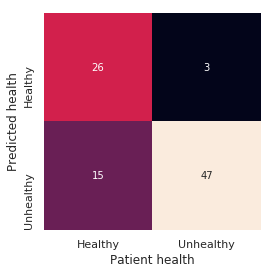

In [68]:
matriz_confusao()

# Árvore

In [72]:
def print_arvore():
    dot_data = tree.export_graphviz(best_estimator, out_file=None, feature_names=data.columns.values[0:-1], class_names=['Healthy', 'Unhealthy'])
    tree_graph = graphviz.Source(dot_data)
    tree_graph.render("tree")
    return tree_graph

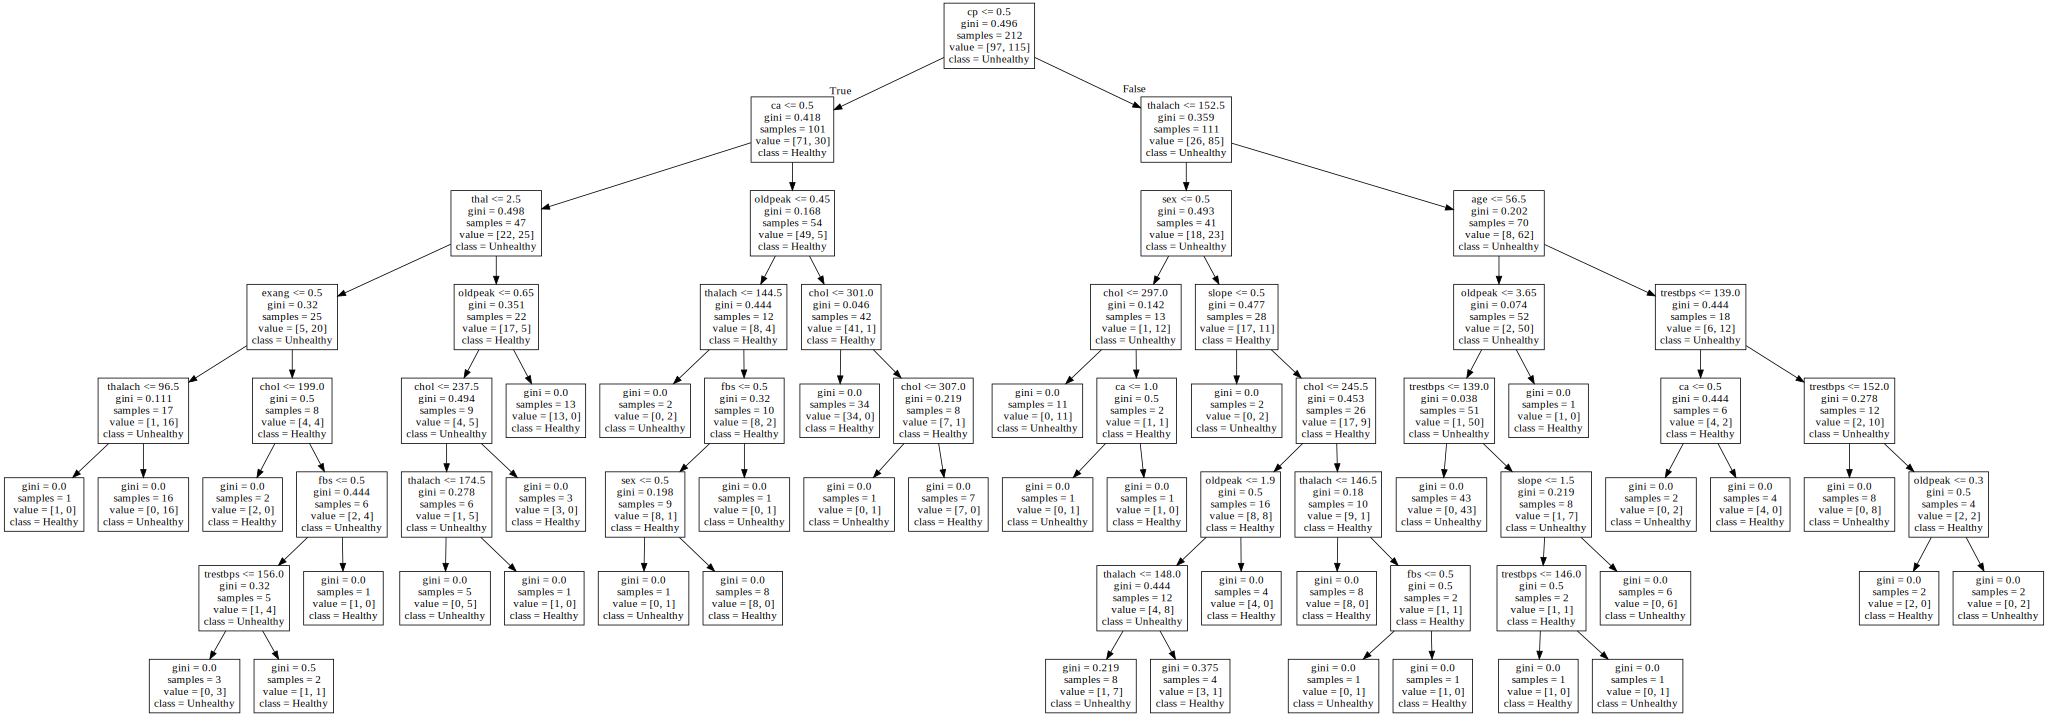

In [73]:
print_arvore()

# Bônus

In [83]:
def print_feature_importances():
    for col, imp in zip(data.columns, best_estimator.feature_importances_):
        print("%12s" % col, "%0.4f" % imp)

In [84]:
print_feature_importances()

         age 0.0230
         sex 0.0670
          cp 0.2301
    trestbps 0.0509
        chol 0.0879
         fbs 0.0345
     restecg 0.0000
     thalach 0.1388
       exang 0.0210
     oldpeak 0.1151
       slope 0.0232
          ca 0.1324
        thal 0.0760
